# 📊 ***Data Science, CA0*** 📚

* **Member 1** : [Kasra Kashani, 810101490] 🆔
* **Member 2** : [Borna Foroohari, 810101480] 🆔

📄 **Subjects**: Central Limit Theorem (CLT), Confidence Interval, Hypothesis Testing, Power of a Test

## 🔹**Imports**

Import required modules.

In [696]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, ttest_ind, levene
from statsmodels.nonparametric.smoothers_lowess import lowess

## 📍 **1) Roulette Simulation and Profit Analysis**

Write a function that simulates this game for N rounds and bet on black each round.

In [535]:
def RouletteSimulation(N, bet):
    total_earning = 0

    for _ in range(N):
        # Randomly select one of the slots
        slot = random.randint(0, 37)

        # Update the total earning whether the chosen slot is black or not
        if ((slot % 2 == 0) and (slot != 0)):
            total_earning += bet
        else:
            total_earning -= bet

    return total_earning

Write a Monte Carlo simulation to simulate the game for N rounds, for `num_simulations` times.

In [536]:
def MonteCarloSimulation(num_simulations, N, bet=1):
    # Run RouletteSimulation for num_simulations round
    return np.array([RouletteSimulation(N, bet) for _ in range(num_simulations)])

Plot the distribution of total earnings using Monte Carlo simulation for 100000 times and 4 different rounds. As we can see in the plots, the distributions appear similar to a normal distribution. This means that the **sample distribution** and so the population distribution has a normal distribution. <p>
Also this is clear that **the larger the value of N, the closer our distribution will be to a normal distribution.**.

In [537]:
# Set parameters
num_simulations = 100000
rounds = [10, 25, 100, 1000]

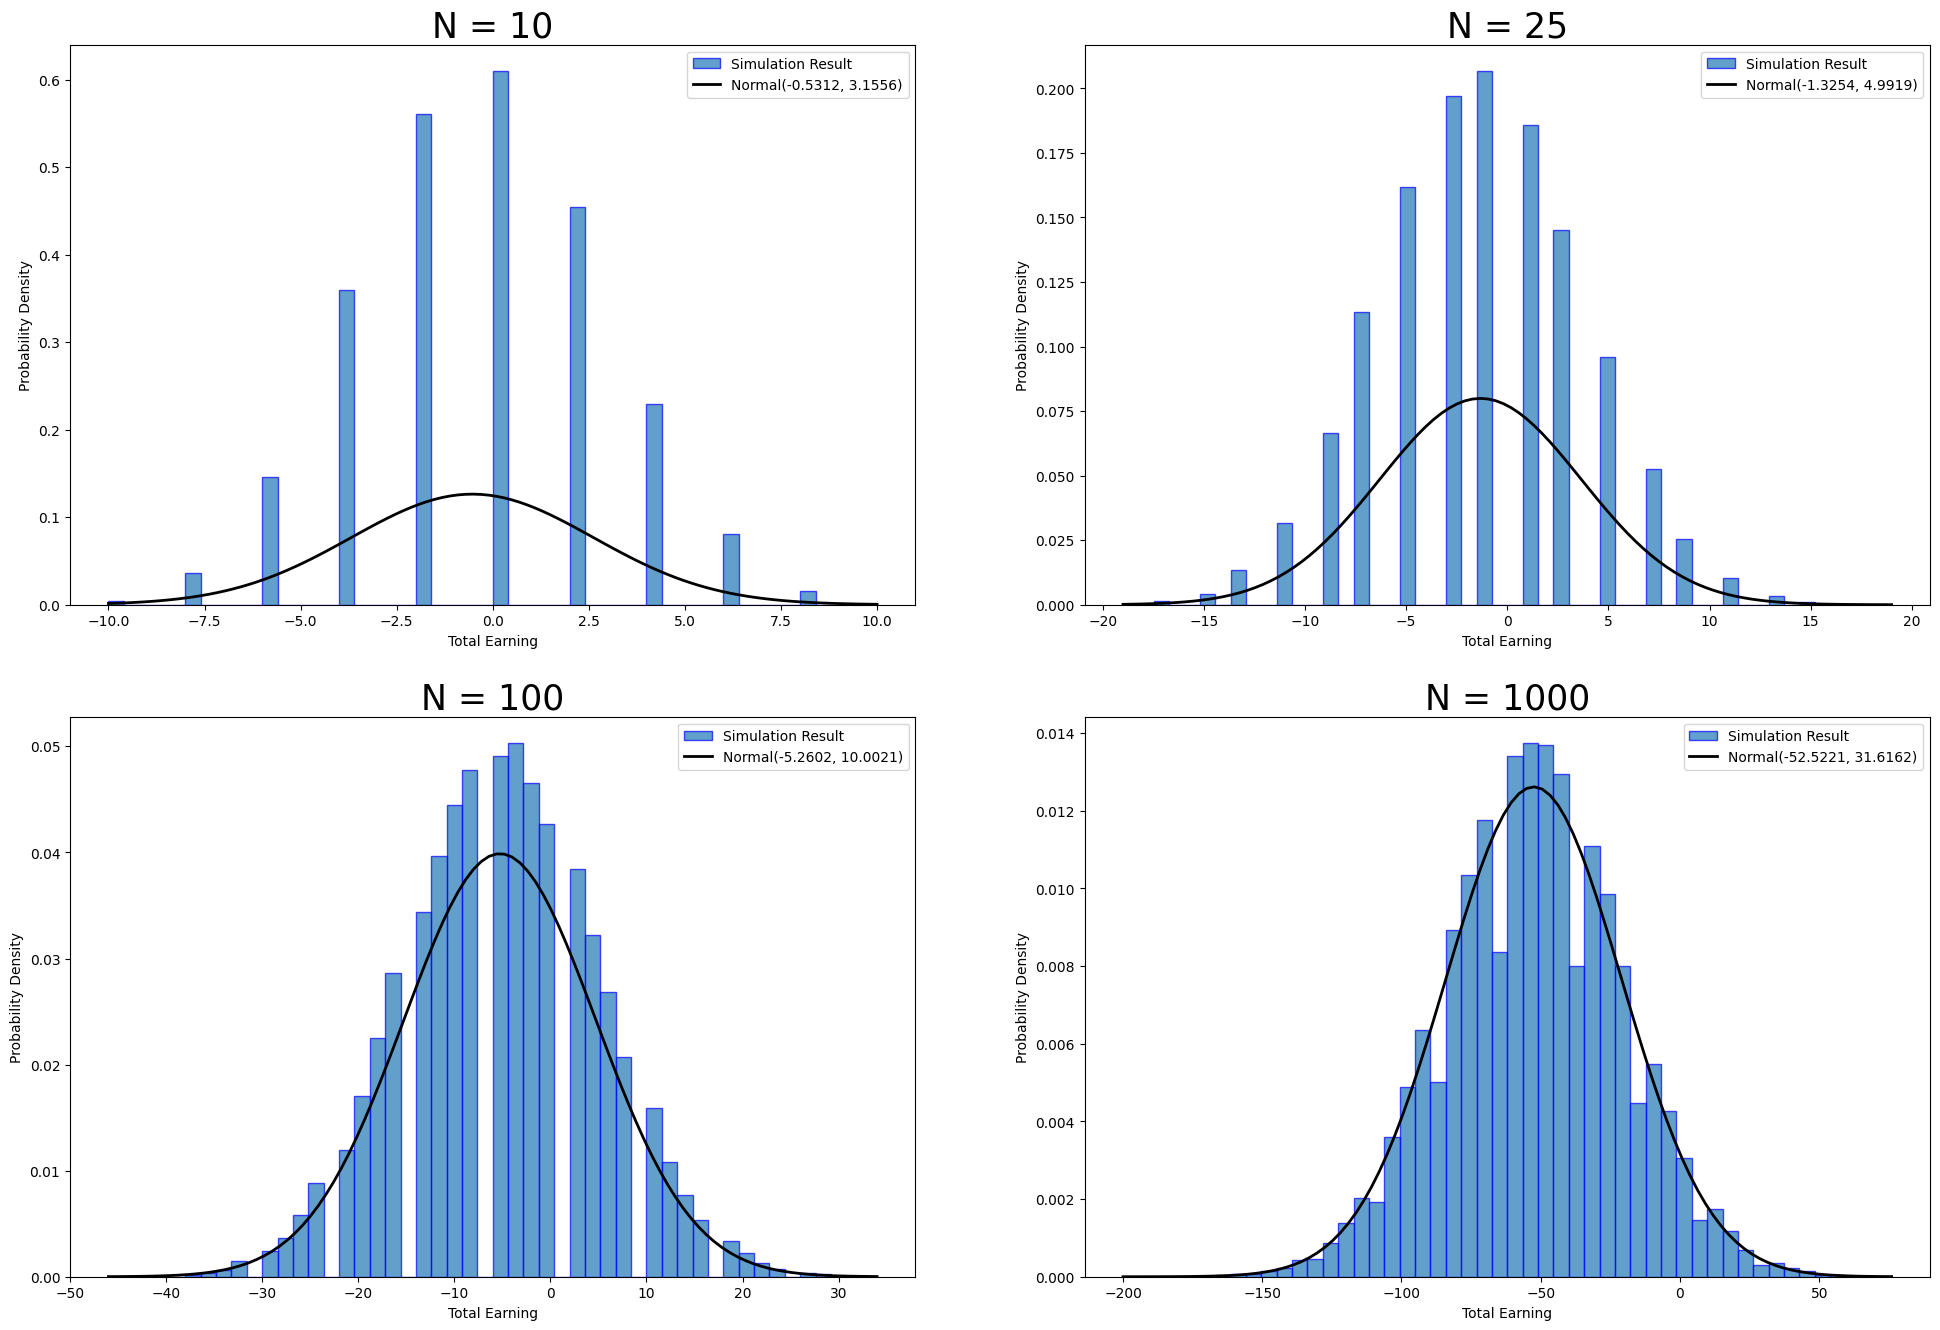

For N = 10:
	Expected Value: -0.5312
	Standard Error: 3.1556
For N = 25:
	Expected Value: -1.3254
	Standard Error: 4.9919
For N = 100:
	Expected Value: -5.2602
	Standard Error: 10.0021
For N = 1000:
	Expected Value: -52.5221
	Standard Error: 31.6162


In [538]:
means_total, stds_total = [], []
plt.figure(figsize=(24, 16))

# Perfom Monte Carlo simulations for total earnings
for i, round in enumerate(rounds):
    distribution = MonteCarloSimulation(num_simulations, round)

    # Calculate mean and standard deviation of sample
    mean, std = np.mean(distribution), np.std(distribution)
 
    # Plot histogram of total earnings distribution
    plt.subplot(2, 2, i+1)
    plt.hist(distribution, bins=50, label='Simulation Result', alpha=0.7, edgecolor='blue', density=True)

    # Plot the related normal distribution
    xgrid = np.linspace(min(distribution), max(distribution), 100)
    ygrid = norm.pdf(xgrid, mean, std)
    plt.plot(xgrid, ygrid, 'k-', linewidth=2, label=f'Normal({mean:.4f}, {std:.4f})')

    # Set the plot's attributes
    plt.title(f'N = {round}', fontsize=25)
    plt.xlabel('Total Earning')
    plt.ylabel('Probability Density')
    plt.legend()

    # Store this distribution's mean and std
    means_total.append(mean)
    stds_total.append(std)

# Show plots
plt.show()

# Print expected values and standard errors for each simulation
for i, round in enumerate(rounds):
    print(f'For N = {round}:')
    print(f'\tExpected Value: {means_total[i]:.4f}')
    print(f'\tStandard Error: {stds_total[i]:.4f}')

Then we plot the expected value and standard error changing by N, and we can observe that **expected value is decreasing and standard error is increasing by increasing the amount of N**.

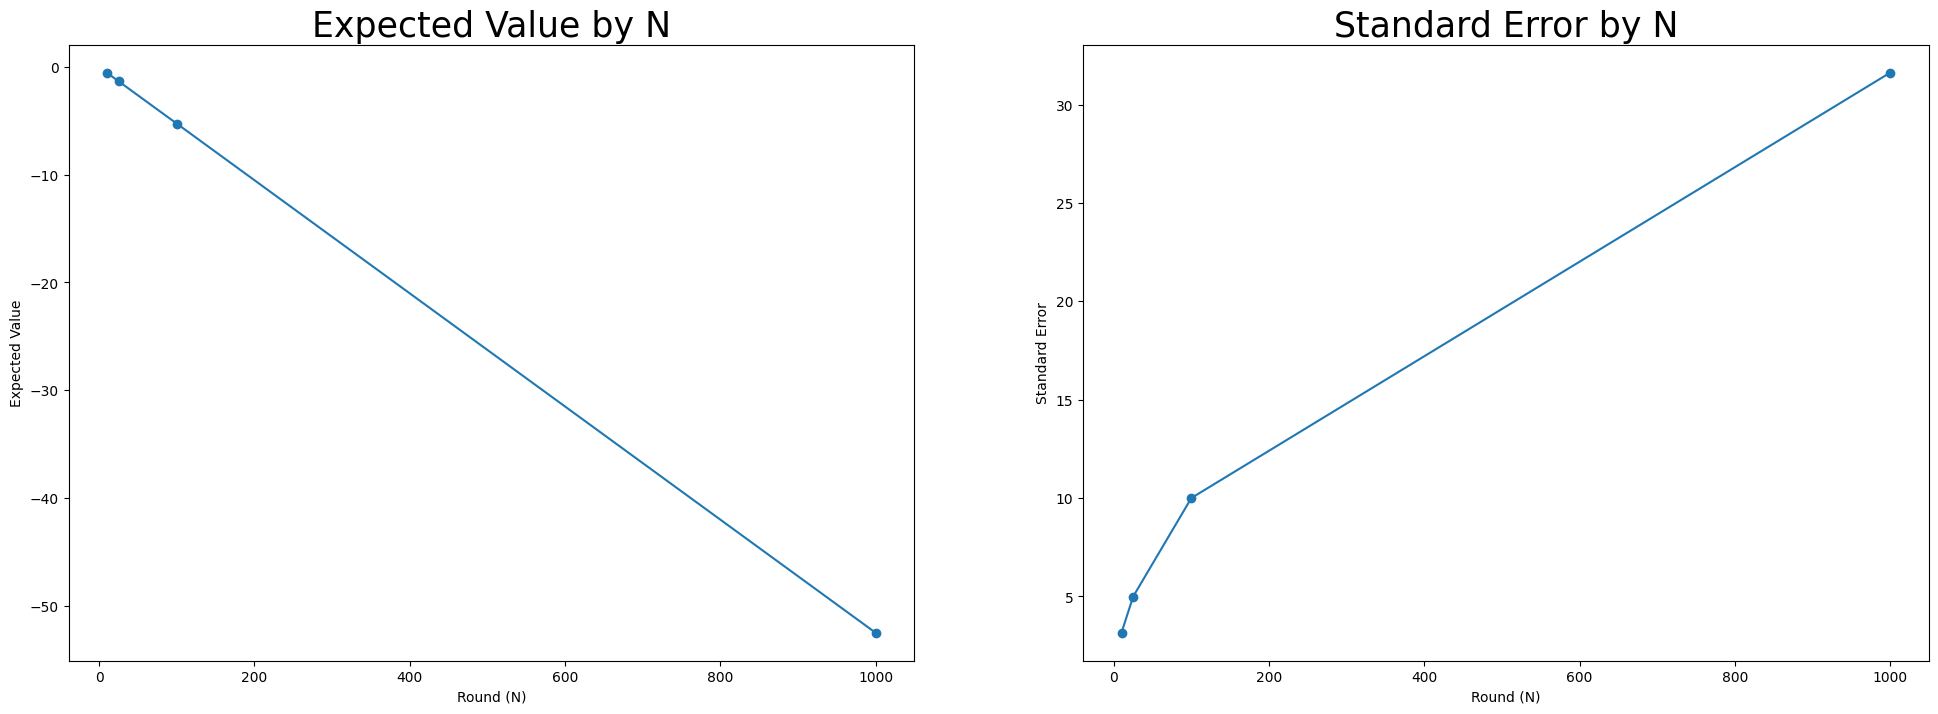

In [539]:
plt.figure(figsize=(24, 8))

# Plot mean of sample distribution for different rounds
plt.subplot(1, 2, 1)
plt.plot(rounds, means_total, linestyle='-', marker='o')

# Set the plot's attributes
plt.title('Expected Value by N', fontsize=25)
plt.xlabel('Round (N)')
plt.ylabel('Expected Value')

# Plot std of sample distribution for different rounds
plt.subplot(1, 2, 2)
plt.plot(rounds, stds_total, linestyle='-', marker='o')

# Set the plot's attributes
plt.title('Standard Error by N', fontsize=25)
plt.xlabel('Round (N)')
plt.ylabel('Standard Error')

# Show plots
plt.show()

Now we plot the distribution of average total earnings using Monte Carlo simulation for 100000 times and 4 different rounds again. As we can see in the plots, the distributions appear similar to a normal distribution. This means that the **sampling distribution** and so the estimated mean has a normal distribution and **CLT can be used**. <p>
Also this is clear that again **the larger the value of N, the closer our distribution will be to a normal distribution.**.

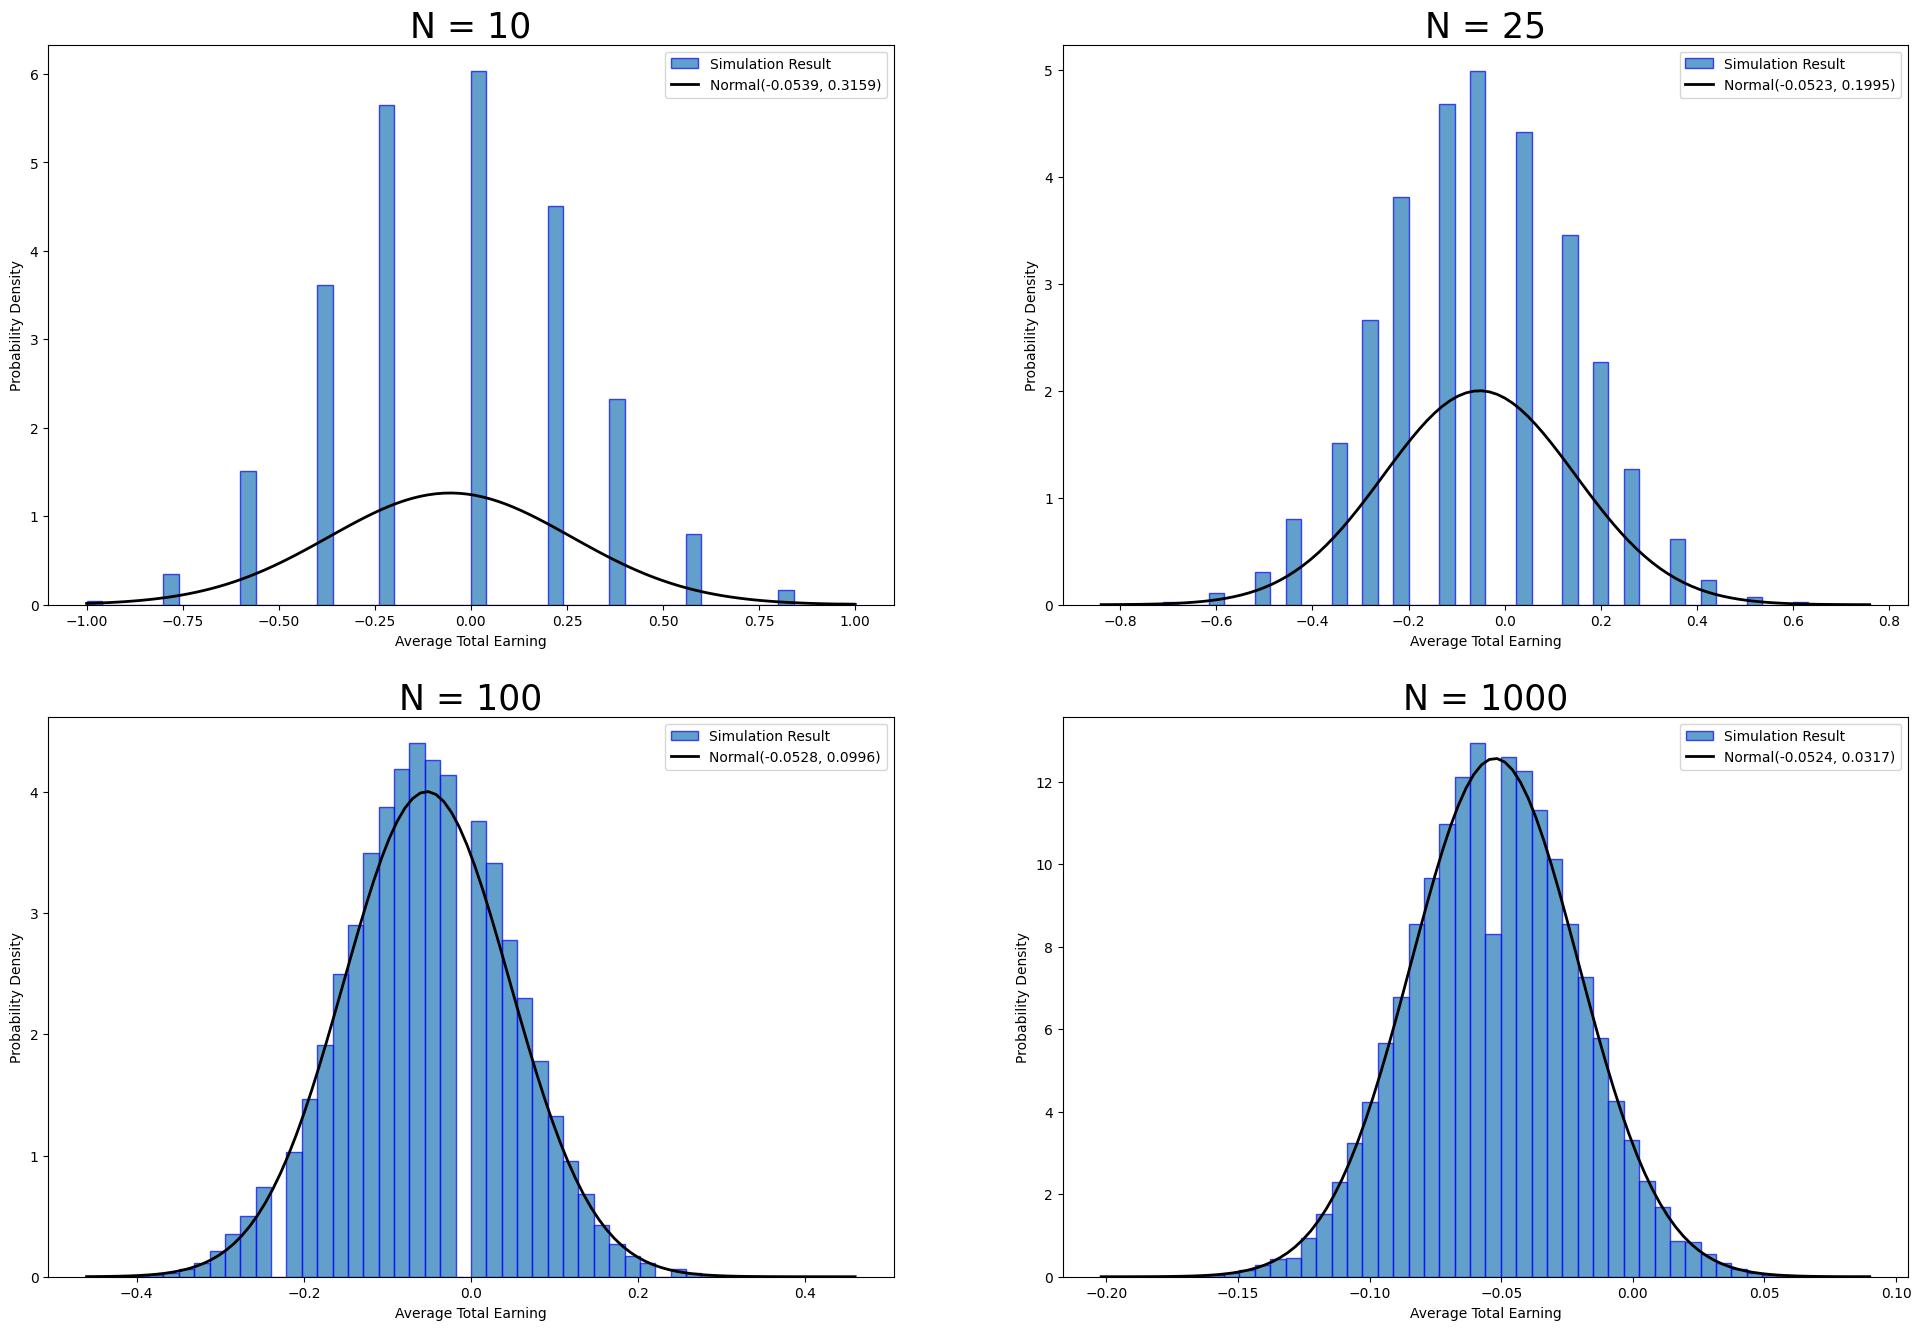

For N = 10:
	Expected Value: -0.0539
	Standard Error: 0.3159
For N = 25:
	Expected Value: -0.0523
	Standard Error: 0.1995
For N = 100:
	Expected Value: -0.0528
	Standard Error: 0.0996
For N = 1000:
	Expected Value: -0.0524
	Standard Error: 0.0317


In [541]:
means_average, stds_average = [], []
plt.figure(figsize=(24, 16))

# Perfom Monte Carlo simulations for average of total earnings
for i, round in enumerate(rounds):
    distribution = MonteCarloSimulation(num_simulations, round) / round

    # Calculate mean and standard deviation of sample distribution
    mean, std = np.mean(distribution), np.std(distribution)

    # Make two rows and two columns of plots
    plt.subplot(2, 2, i+1)
 
    # Plot histogram of average total earnings distribution
    plt.hist(distribution, bins=50, label='Simulation Result', alpha=0.7, edgecolor='blue', density=True)

    # Plot the related normal distribution
    xgrid = np.linspace(min(distribution), max(distribution), 100)
    ygrid = norm.pdf(xgrid, mean, std)
    plt.plot(xgrid, ygrid, 'k-', linewidth=2, label=f'Normal({mean:.4f}, {std:.4f})')

    # Set the plot's sttributes
    plt.title(f'N = {round}', fontsize=25)
    plt.xlabel('Average Total Earning')
    plt.ylabel('Probability Density')
    plt.legend()

    # Store this distribution's mean and std
    means_average.append(mean)
    stds_average.append(std)

# Show plots
plt.show()

# Print expected values and standard errors for each simulation in N turns
for i, round in enumerate(rounds):
    print(f'For N = {round}:')
    print(f'\tExpected Value: {means_average[i]:.4f}')
    print(f'\tStandard Error: {stds_average[i]:.4f}')

Then we plot the expected value and standard error changing by N again, and we can observe that **standard error is decreasing by increasing the amount of N**, as we expected from CLT. Also, expected value's changing is not clear by changing N.

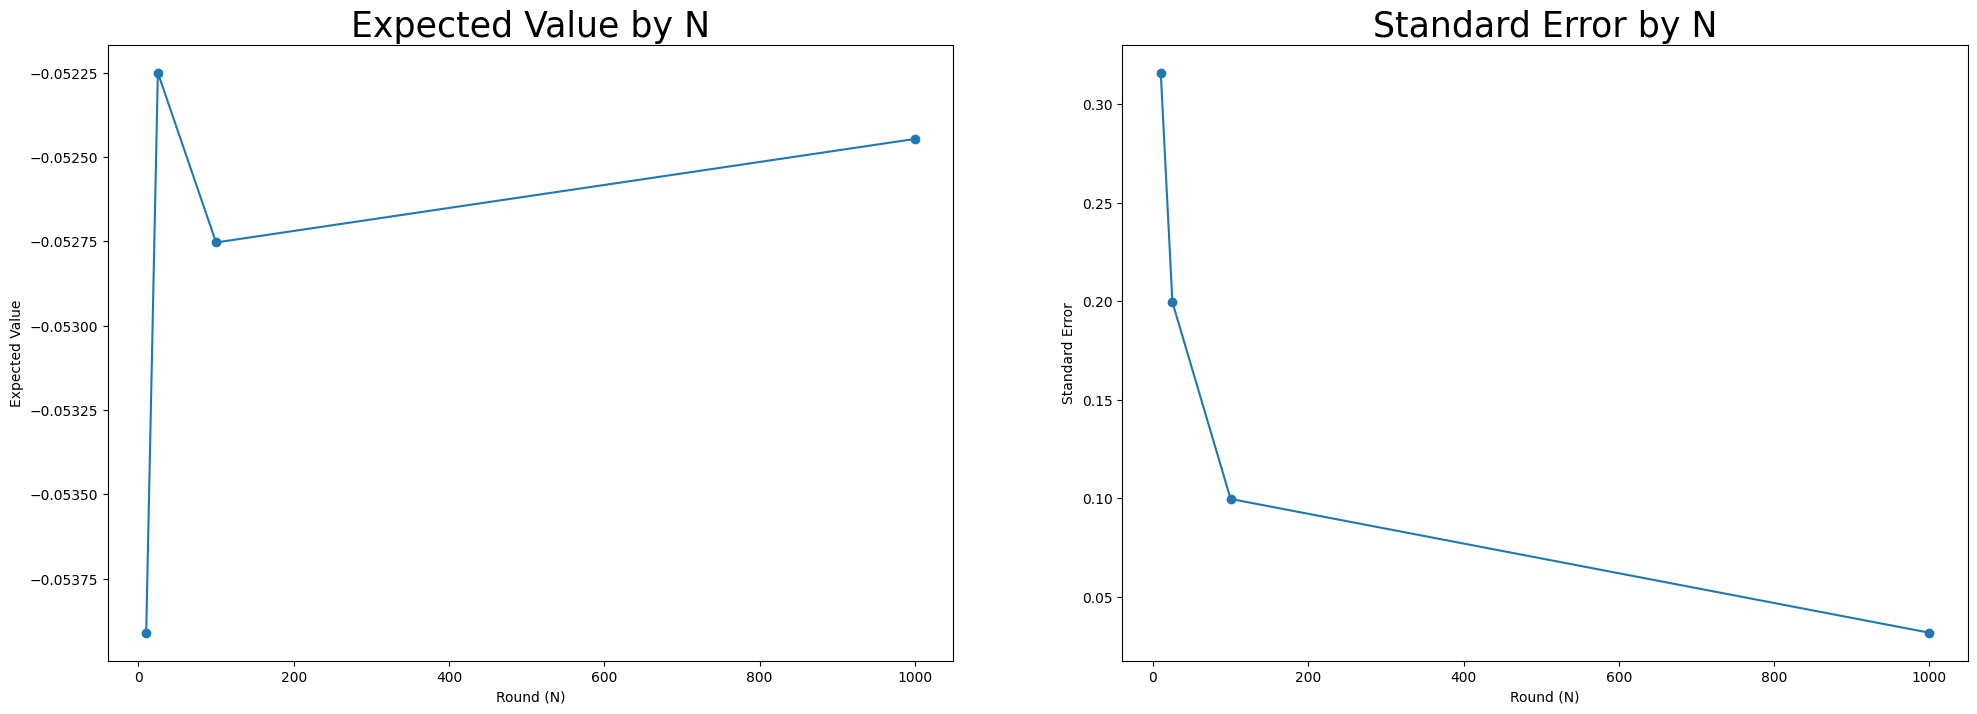

In [542]:
plt.figure(figsize=(24, 8))

# Plot mean of sampling distribution for different rounds
plt.subplot(1, 2, 1)
plt.plot(rounds, means_average, linestyle='-', marker='o')

# Set the plot's attributes
plt.title('Expected Value by N', fontsize=25)
plt.xlabel('Round (N)')
plt.ylabel('Expected Value')

# Plot std of sampling distribution for different rounds
plt.subplot(1, 2, 2)
plt.plot(rounds, stds_average, linestyle='-', marker='o')

# Set the plot's attributes
plt.title('Standard Error by N', fontsize=25)
plt.xlabel('Round (N)')
plt.ylabel('Standard Error')

# Show plots
plt.show()

Now we write a function to calculate the theoretical expected value and standard error of total earings, which is a discrete random variable, for each N according to their formulas:
$$ E(X) = \sum_{i=1}^{N} x_{i}P(X = x_{i}) = bet*P_{win} + -bet*P_{loose} $$
$$ Var(X) = \sum_{i=1}^{N} (x_{i}-E(X))^2P(X = x_{i}) = (bet - E(X))^2*P_{win} + (-bet - E(X))^2*P_{loose} $$ 
$$ SE(X) = \sqrt{Var(X)} $$
Note that each turn's total earning is independant from the other rounds.

In [543]:
def TheoreticalMeanStd(N, bet=1):
    # Compute probability of our win in each turn
    p_win = 18/38
    p_loose = 20/38

    # Compute expected value and variance of our total earning in each turn
    round_expected_value = (bet * p_win) + (-bet * p_loose)
    round_variance = (math.pow(bet - round_expected_value, 2) * p_win) + (math.pow(-bet - round_expected_value, 2) * p_loose)

    # Compute expected value and standard error of our total earning in N turns (using the fact that each turn's total earning is independent from the rest)
    total_expected_value = round_expected_value * N
    total_variance = round_variance * N
    total_standard_error = math.sqrt(total_variance)

    return total_expected_value, total_standard_error

Computing the theoretical expected value `EV` and standard error `SE` of total earnings for each round (N) and compare these values with our previous Monte Carlo simulation results. As we can see, **these amounts are almost the same with a very little error**.

In [544]:
# Print simulation and theoretical expected values and standard errors and their errors in N turns
for i, round in enumerate(rounds):
    EV, SE = TheoreticalMeanStd(round)
    
    print(f'For N = {round}:')
    print(f'\tSimulation Expected Value: {means_total[i]:.4f} | Theoretical Expected Value: {EV:.4f} -> ERROR = {abs(means_total[i] - EV):.4f}')
    print(f'\tSimulation Standard Error: {stds_total[i]:.4f} | Theoretical Standard Error: {SE:.4f} -> ERROR = {abs(stds_total[i] - SE):.4f}')

For N = 10:
	Simulation Expected Value: -0.5312 | Theoretical Expected Value: -0.5263 -> ERROR = 0.0049
	Simulation Standard Error: 3.1556 | Theoretical Standard Error: 3.1579 -> ERROR = 0.0023
For N = 25:
	Simulation Expected Value: -1.3254 | Theoretical Expected Value: -1.3158 -> ERROR = 0.0096
	Simulation Standard Error: 4.9919 | Theoretical Standard Error: 4.9931 -> ERROR = 0.0012
For N = 100:
	Simulation Expected Value: -5.2602 | Theoretical Expected Value: -5.2632 -> ERROR = 0.0029
	Simulation Standard Error: 10.0021 | Theoretical Standard Error: 9.9861 -> ERROR = 0.0160
For N = 1000:
	Simulation Expected Value: -52.5221 | Theoretical Expected Value: -52.6316 -> ERROR = 0.1095
	Simulation Standard Error: 31.6162 | Theoretical Standard Error: 31.5789 -> ERROR = 0.0372


Now we use the CLT and approximate the probability that the casino loses money, means that we win money and calculate the probability of P(X > 0), when we play N = 25 rounds. As this probability has a normal distribution according to the CLT, we can compute this probability with this formula:
$$ P_{casinoLoose} = 1 - P(X \le 0) = 1 - F_{X}(0) $$
Where X is our total earning random variable and as we know, X has a normal distribution and F is the CDF of a normal distribution so that we can compute the probability. <p>
Then we use our Monte Carlo simulation to calculate this probability to verify that approximation. The target probability is the number of times that our total earning is positive divided by the number of total simulation times. <p>
As you can see, **these two probablities are almost the same with a very little error**.

In [545]:
N = 25

# Find theoretical mean and std of our total earning in N turns
mean, std = TheoreticalMeanStd(N)

# Compute probability of casino loosing money using CLT
p_casino_loose_CLT = 1 - norm.cdf(0, loc=mean, scale=std)

# Run Monte Carlo simulation
distribution = MonteCarloSimulation(num_simulations, N)

# Compute probability of casino loosing money using Monte Carlo simulation
p_casino_loose_Monte = np.count_nonzero(distribution > 0) / num_simulations

# Print probability of casino loosing money in N turns using CLT and Monte Carlo simulation
print(f'For N = {N}:')
print(f'\tCLT probability of casino loosing money: {p_casino_loose_CLT:.4f} | Monte Carlo probability of casino loosing money using: {p_casino_loose_Monte:.4f} -> ERROR = {abs(p_casino_loose_CLT - p_casino_loose_Monte):.4f}')

For N = 25:
	CLT probability of casino loosing money: 0.3961 | Monte Carlo probability of casino loosing money using: 0.3915 -> ERROR = 0.0046


At the end, we plot the the probability that the casino loses money as a function of N for values N ranging from 25 to 1000 rounds. As a result, we can observe that **as we play the game for more times and continue betting, the probablity of the casino loses money decreases and we loose more money**. <p>
Hence, that's the reason why the casino encourages players to play more in light of these results!

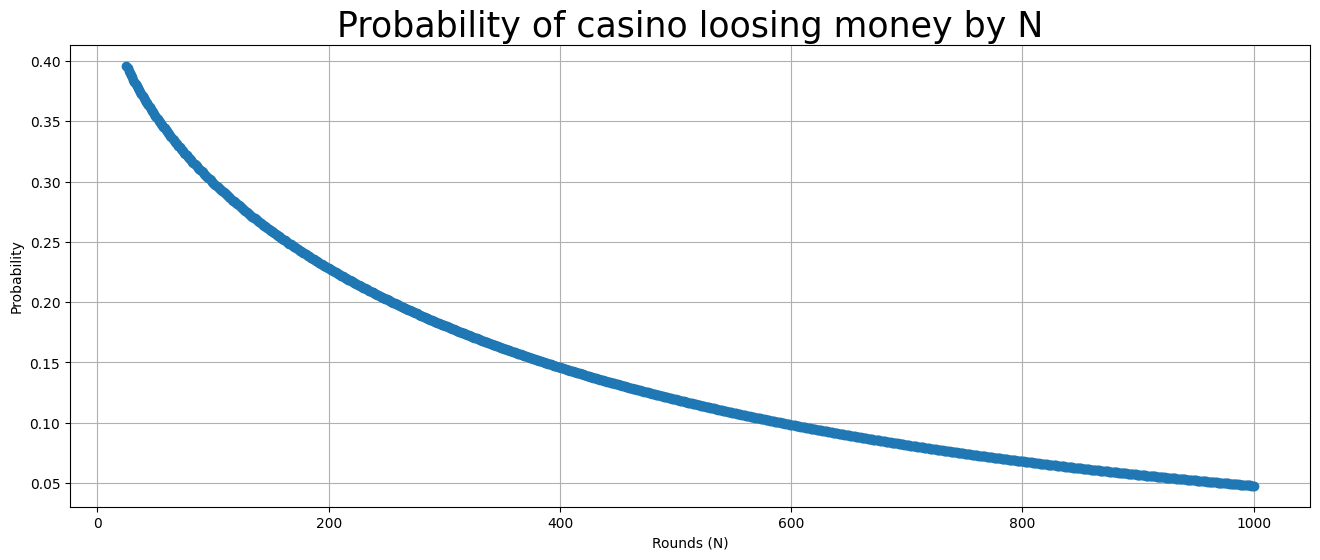

In [547]:
probabilities = []
new_rounds = list(range(25, 1001))

for round in new_rounds:
    # Find theoretical mean and std of our total earning in N turns
    mean, std = TheoreticalMeanStd(round)

    # Compute probability of casino loosing money using CLT
    p_casino_loose_CLT = 1 - norm.cdf(0, loc=mean, scale=std)

    # Add this probability to the list
    probabilities.append(p_casino_loose_CLT)

plt.figure(figsize=(16, 6))

# Plot probabilities of casino loosing money for different rounds
plt.plot(new_rounds, probabilities, linestyle='-', marker='o')

# Set the plot's attributes
plt.title('Probability of casino loosing money by N', fontsize=25)
plt.xlabel('Rounds (N)')
plt.ylabel('Probability')
plt.grid(True)

# Show the plot
plt.show()

## 📍 **2) Predicting the Outcome of the 2016 USA Presidential Election**

Firts we load the dataset as a pandas dataframe and observe some information that it contains.

In [697]:
# Read CSV dataset in a dataframe
df = pd.read_csv('2016-general-election-trump-vs-clinton.csv')

# Show preview of the dataframe's information
df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,NaN,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,YouGov/Economist,2015-06-20,2015-06-22,2015-06-26T01:02:40Z,266.0,Registered Voters - independent,Internet,34.0,45.0,NaN,21.0,http://elections.huffingtonpost.com/pollster/p...,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Nonpartisan,NaN,NaN,1
1518,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,1711.0,Registered Voters,Live Phone,32.0,50.0,3.0,14.0,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,NaN,NaN,1
1519,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,748.0,Registered Voters - Democrat,Live Phone,5.0,89.0,0.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,NaN,NaN,1
1520,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,679.0,Registered Voters - Republican,Live Phone,68.0,9.0,4.0,19.0,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,NaN,NaN,1


In [698]:
# Show null and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                1522 non-null   object 
 1   Start Date              1522 non-null   object 
 2   End Date                1522 non-null   object 
 3   Entry Date/Time (ET)    1522 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Population              1522 non-null   object 
 6   Mode                    1522 non-null   object 
 7   Trump                   1522 non-null   float64
 8   Clinton                 1522 non-null   float64
 9   Other                   1098 non-null   float64
 10  Undecided               1460 non-null   float64
 11  Pollster URL            1522 non-null   object 
 12  Source URL              1522 non-null   object 
 13  Partisan                1522 non-null   object 
 14  Affiliation             88 non-null     

We do a little preprocessing such as dropping rows that contain NaN values in their `Number of Observations` column, and dropping affiliated pollsters from `Affiliation` column.

In [699]:
# Drop rows which contain NaN in Number of observations column
df = df.dropna(subset=['Number of Observations'])

# Drop rows which don't contain None in Affiliation column due to specific parties affiliating
df = df[df['Affiliation'].isna()]

# Show null and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 0 to 1520
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                969 non-null    object 
 1   Start Date              969 non-null    object 
 2   End Date                969 non-null    object 
 3   Entry Date/Time (ET)    969 non-null    object 
 4   Number of Observations  969 non-null    float64
 5   Population              969 non-null    object 
 6   Mode                    969 non-null    object 
 7   Trump                   969 non-null    float64
 8   Clinton                 969 non-null    float64
 9   Other                   625 non-null    float64
 10  Undecided               946 non-null    float64
 11  Pollster URL            969 non-null    object 
 12  Source URL              969 non-null    object 
 13  Partisan                969 non-null    object 
 14  Affiliation             0 non-null      object

Then we only maintain necessary columns of our dataframe.

In [700]:
# Only save necessary columns from dataframe
df = df[['Number of Observations', 'Trump', 'Clinton']]

# Show preview of the dataframe's information
df

,Number of Observations,Trump,Clinton
0,940.0,41.0,45.0
4,1107.0,43.0,41.0
5,3669.0,41.0,45.0
6,1392.0,6.0,90.0
7,1110.0,84.0,4.0
...,...,...,...
1516,235.0,65.0,12.0
1517,266.0,34.0,45.0
1518,1711.0,32.0,50.0
1519,748.0,5.0,89.0


Now we calculate the number of Trump and Clinton supporters and save them in our dataframe.

In [701]:
# Compute Trump and Clinton supporters from the number of observations and their voters
df['Trump Supporters'] = (df['Trump']/100) * df['Number of Observations']
df['Clinton Supporters'] = (df['Clinton']/100) * df['Number of Observations']

# Drop the percentage of voters, Trump and Clinton columns, that afe unnecessary now
df = df.drop(['Trump', 'Clinton'], axis=1)

# Show preview of the dataframe's information
df

,Number of Observations,Trump Supporters,Clinton Supporters
0,940.0,385.40,423.00
4,1107.0,476.01,453.87
5,3669.0,1504.29,1651.05
6,1392.0,83.52,1252.80
7,1110.0,932.40,44.40
...,...,...,...
1516,235.0,152.75,28.20
1517,266.0,90.44,119.70
1518,1711.0,547.52,855.50
1519,748.0,37.40,665.72


We compute the 95% confidence interval (CI) for p based on the CLT result, where p is he true proportion of voters supporting the Democratic candidate, Clinton. According to the defined random variable X, it has a Bernoulli distribution. We conduct this 95% CI using CLT and this formula:
$$ p \in (\hat{p} - Z_{0.975}*SE, \; \hat{p} + Z_{0.975}*SE) $$
Where:
$$ SE = \sqrt{\dfrac{\hat{p} * (1 - \hat{p})}{N}} $$

In [702]:
# Compute sample mean of Clinton supporters (xbar_clinton = phat)
xbar_clinton = np.sum(df['Clinton Supporters']) / np.sum(df['Number of Observations'])

# Compute sample SE of Clinton supporters
SE = math.sqrt(xbar_clinton * (1 - xbar_clinton) / np.sum(df['Number of Observations']))

# Set Z for critical value of 95% confidence
Z = norm.ppf(0.975)

# Compute a 95% confidence interval for p
low = xbar_clinton - (Z * SE)
up = xbar_clinton + (Z * SE)

# Print the 95% confidence interval for p
print(f'A 95% confidence interval (CI) for p, the true proportion of voters supporting Clinton: ({low:.4f}, {up:.4f}) or ({low*100:.4f}%, {up*100:.4f}%)')

A 95% confidence interval (CI) for p, the true proportion of voters supporting Clinton: (0.4546, 0.4560) or (45.4576%, 45.6002%)


Write a Monte carlo simulation to show that the 95% CI derived in the last cell, captures the true proportion p approximately 95% of the time. For this, we generate a sample with N numbers using Bernoulli distribution with parameter µ, which is the true population proportion p, for `num_simulations` times and build a 95% CI for that samples's p. Then we return percentage of times that the conducted confidence intervals capture the real µ.

In [703]:
def MonteCarloSimulation(num_simulations, N, miu):
    num_captures = 0

    # Run for num_simulations iterations
    for _ in range(num_simulations):
        # Generate a sample from Bernoulli(p=miu)
        sample = bernoulli.rvs(miu, size=N)

        # Compute sample mean (xbar_Clinton = phat)
        xbar_Clinton = np.mean(sample)

        # Compute sample SE
        SE = np.sqrt(xbar_Clinton * (1 - xbar_Clinton) / N)  

        # Set Z for critical value of 95% confidence
        Z = norm.ppf(0.975)    

        # Compute a 95% confidence interval for p
        low = xbar_Clinton - (Z * SE)
        up = xbar_Clinton + (Z * SE)

        # Determine if this computed confidence interval captures the true p or not
        if (low <= miu <= up):
            num_captures += 1

    return (num_captures / num_simulations) * 100

We run the Monte Carlo simulation for N = 30 and iterations = 100000 and we can see as a result, **approximately 95% of the times the 95% confidence intervals capture the p = 0.47**.

In [704]:
# Set parameters and the true population proportion (miu_clinton = p)
miu_clinton = 0.47
num_simulations = 100000
N = 30

# Run Monte Carlo simulation
percent_CI_captures = MonteCarloSimulation(num_simulations, N, miu_clinton)

# Show whether our 95% confidence intervals capture the true p
print(f'The percentage of times that 95% confidence intervals captures the true population proportion p = {miu_clinton}: {percent_CI_captures:.4f}%')

The percentage of times that 95% confidence intervals captures the true population proportion p = 0.47: 93.2100%


Load the dataset again as a pandas dataframe and only maintain our needed columns. Also we drop rows that contain NaN values in their `Number of Observations` column. Then observe some information that it contains.

In [705]:
# Read CSV dataset in a dataframe again
df = pd.read_csv('2016-general-election-trump-vs-clinton.csv')

# Only save Trump, Clinton, Pollster, Start Date, Number of Observations and Mode
df = df[['Trump', 'Clinton', 'Pollster', 'Start Date', 'Number of Observations', 'Mode']]

# Drop rows which contain NaN in Number of observations column
df = df.dropna(subset=['Number of Observations'])

# Show preview of the dataframe's information
df

,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode
0,41.0,45.0,Insights West,2016-11-04,940.0,Internet
4,43.0,41.0,IBD/TIPP,2016-11-04,1107.0,Live Phone
5,41.0,45.0,YouGov/Economist,2016-11-04,3669.0,Internet
6,6.0,90.0,YouGov/Economist,2016-11-04,1392.0,Internet
7,84.0,4.0,YouGov/Economist,2016-11-04,1110.0,Internet
...,...,...,...,...,...,...
1516,65.0,12.0,YouGov/Economist,2015-06-20,235.0,Internet
1517,34.0,45.0,YouGov/Economist,2015-06-20,266.0,Internet
1518,32.0,50.0,Quinnipiac,2015-05-19,1711.0,Live Phone
1519,5.0,89.0,Quinnipiac,2015-05-19,748.0,Live Phone


In [706]:
# Show null and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1013 entries, 0 to 1520
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trump                   1013 non-null   float64
 1   Clinton                 1013 non-null   float64
 2   Pollster                1013 non-null   object 
 3   Start Date              1013 non-null   object 
 4   Number of Observations  1013 non-null   float64
 5   Mode                    1013 non-null   object 
dtypes: float64(3), object(3)
memory usage: 55.4+ KB


Before creating a time-series plot, we should convert type of the `Start Date` column to datetime, so that we can do timing calculations on them as the x axis.

In [707]:
# Ensure the Start Date column is a datetime type to do time-series plots
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Show null and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1013 entries, 0 to 1520
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Trump                   1013 non-null   float64       
 1   Clinton                 1013 non-null   float64       
 2   Pollster                1013 non-null   object        
 3   Start Date              1013 non-null   datetime64[ns]
 4   Number of Observations  1013 non-null   float64       
 5   Mode                    1013 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 55.4+ KB


Then we sort `Start Date` columns to show them as x axis in our time-series plot.

In [708]:
# Sort dataframe by Start Date
df = df.sort_values('Start Date')

# Show preview of the dataframe's information
df

,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode
1520,68.0,9.0,Quinnipiac,2015-05-19,679.0,Live Phone
1519,5.0,89.0,Quinnipiac,2015-05-19,748.0,Live Phone
1518,32.0,50.0,Quinnipiac,2015-05-19,1711.0,Live Phone
1514,35.0,46.0,YouGov/Economist,2015-06-20,869.0,Internet
1517,34.0,45.0,YouGov/Economist,2015-06-20,266.0,Internet
...,...,...,...,...,...,...
14,41.0,44.0,Bloomberg/Selzer,2016-11-04,799.0,Live Phone
44,39.0,32.0,Politico/Morning Consult,2016-11-04,416.0,Internet
43,85.0,9.0,Politico/Morning Consult,2016-11-04,495.0,Internet
9,40.0,45.0,Lucid/The Times-Picayune,2016-11-04,931.0,Internet


Now we plot the time-series of poll results showing support percentages for Trump and Clinton, using LOWESS for a smoother trend line.

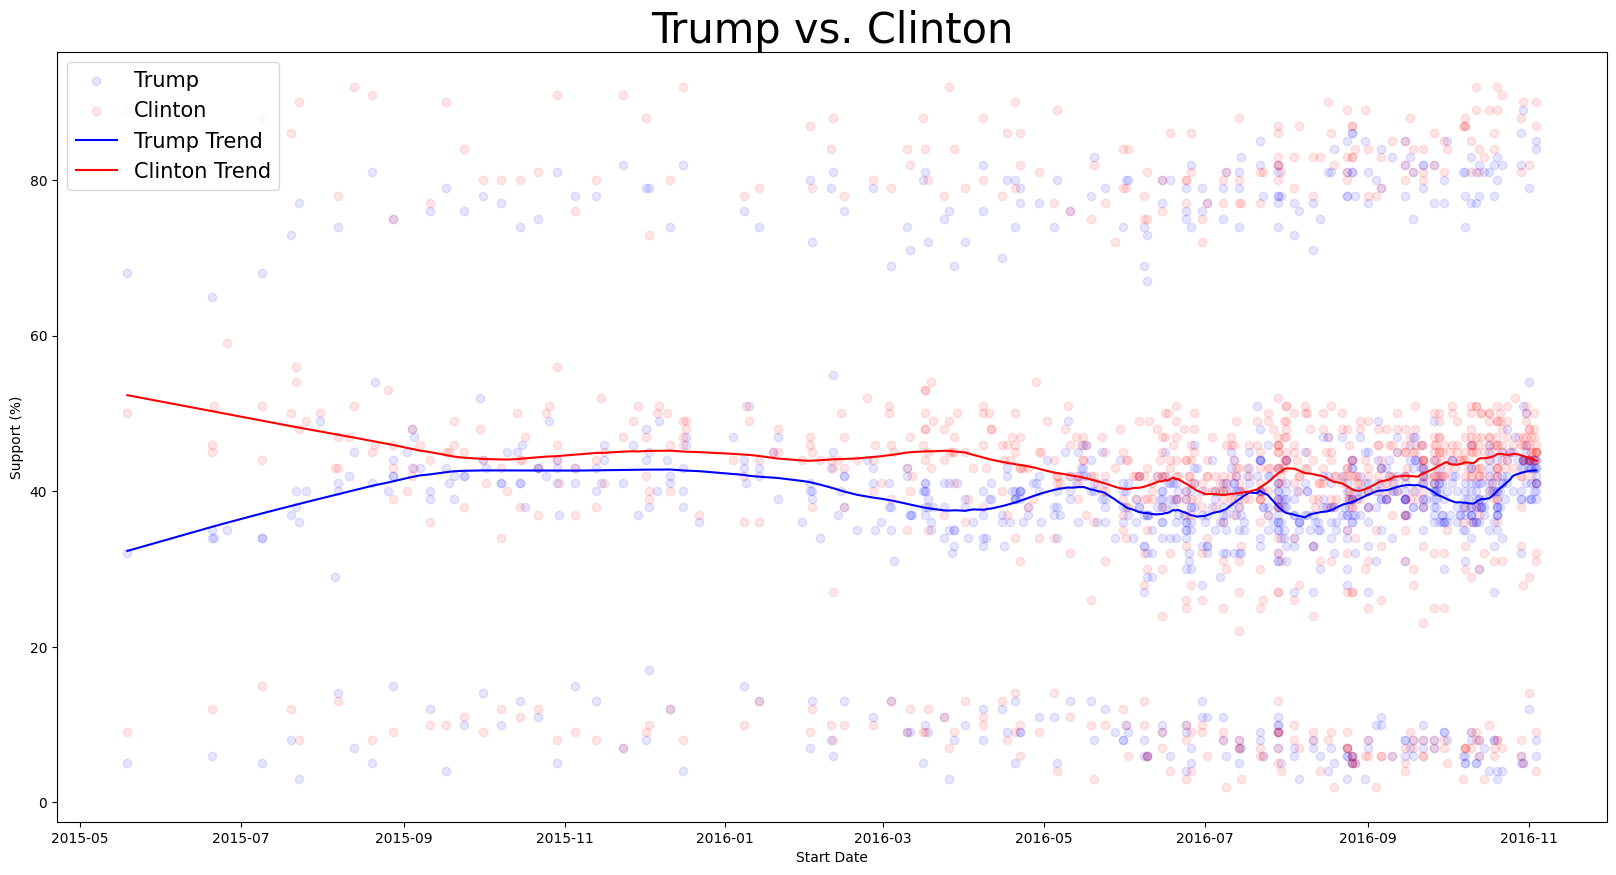

In [709]:
plt.figure(figsize=(20, 10))

# Scatter plot for raw data points
plt.scatter(df['Start Date'], df['Trump'], label='Trump', alpha=0.1, color='blue')
plt.scatter(df['Start Date'], df['Clinton'], label='Clinton', alpha=0.1, color='red')

# Declare a numerical date for LOWESS smoothing and convert dates to seconds
seconds = df['Start Date'].astype(int) // math.pow(10, 9)

# Apply LOWESS smoothing
trump_lowess = lowess(df['Trump'], seconds, frac=0.1)
clinton_lowess = lowess(df['Clinton'], seconds, frac=0.1)

# Plot time-series for Trump and Clinton support percentages using LOWESS trend lines
plt.plot(pd.to_datetime(trump_lowess[:, 0], unit='s'), trump_lowess[:, 1], label='Trump Trend', color='blue')
plt.plot(pd.to_datetime(clinton_lowess[:, 0], unit='s'), clinton_lowess[:, 1], label='Clinton Trend', color='red')

# Set the plot's attributes
plt.title('Trump vs. Clinton', fontsize=30)
plt.xlabel("Start Date")
plt.ylabel("Support (%)")
plt.legend(fontsize=15)

# Show the plot
plt.show()

In [710]:
# Show preview of the dataframe's information
df

,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode
1520,68.0,9.0,Quinnipiac,2015-05-19,679.0,Live Phone
1519,5.0,89.0,Quinnipiac,2015-05-19,748.0,Live Phone
1518,32.0,50.0,Quinnipiac,2015-05-19,1711.0,Live Phone
1514,35.0,46.0,YouGov/Economist,2015-06-20,869.0,Internet
1517,34.0,45.0,YouGov/Economist,2015-06-20,266.0,Internet
...,...,...,...,...,...,...
14,41.0,44.0,Bloomberg/Selzer,2016-11-04,799.0,Live Phone
44,39.0,32.0,Politico/Morning Consult,2016-11-04,416.0,Internet
43,85.0,9.0,Politico/Morning Consult,2016-11-04,495.0,Internet
9,40.0,45.0,Lucid/The Times-Picayune,2016-11-04,931.0,Internet


We compute the total number of voters observed by summing all poll observations in the dataset and the estimated proportion of voters favoring Trump and Clinton. Then we display these estimates in a pandas dataframe table.

In [711]:
# Calculate the total number of voters observed
total_voters = np.sum(df['Number of Observations'])

# Calculate the estimated proportion of voters supporting Trump and Clinton
Trump_proportion = np.sum((df['Trump']/100) * df['Number of Observations']) / total_voters
Clinton_proportion = np.sum((df['Clinton']/100) * df['Number of Observations']) / total_voters

# Display these estimates in a table
results = {
    'Candidate': ['Trump', 'Clinton'],
    'Proportion': [f'{(Trump_proportion*100):.4f}%', f'{(Clinton_proportion*100):.4f}%']
}
df_results = pd.DataFrame(results)

# Show the result table
df_results


,Candidate,Proportion
0,Trump,40.5834%
1,Clinton,45.6121%


Then, using our last calculated data, we compute the 95% confidence intervals for Trump and Clinton support proportions, using the previously described formulas.

In [712]:
# Compute sample mean of Trump and Clinton supporters
xbar_Trump = Trump_proportion
xbar_Clinton = Clinton_proportion

# Compute sample SE of Trump and Clinton supporters
SE_Trump = math.sqrt(xbar_Trump * (1 - xbar_Trump) / total_voters)
SE_Clinton = math.sqrt(xbar_Clinton * (1 - xbar_Clinton) / total_voters)

# Set Z for critical value of 95% confidence
Z = norm.ppf(0.975)

# Compute a 95% confidence interval for p
low_Trump = xbar_Trump - (Z * SE_Trump)
up_Trump = xbar_Trump + (Z * SE_Trump)
low_Clinton = xbar_Clinton - (Z * SE_Clinton)
up_Clinton = xbar_Clinton + (Z * SE_Clinton)

# Add these 95% confidence intervals to the result table
df_results['95% CI'] = [f'({low_Trump*100:.4f}%, {up_Trump*100:.4f}%)', f'({low_Clinton*100:.4f}%, {up_Clinton*100:.4f}%)']

# Show the result table
df_results

,Candidate,Proportion,95% CI
0,Trump,40.5834%,"(40.5143%, 40.6524%)"
1,Clinton,45.6121%,"(45.5420%, 45.6822%)"


In [713]:
# Show preview of the dataframe's information
df

,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode
1520,68.0,9.0,Quinnipiac,2015-05-19,679.0,Live Phone
1519,5.0,89.0,Quinnipiac,2015-05-19,748.0,Live Phone
1518,32.0,50.0,Quinnipiac,2015-05-19,1711.0,Live Phone
1514,35.0,46.0,YouGov/Economist,2015-06-20,869.0,Internet
1517,34.0,45.0,YouGov/Economist,2015-06-20,266.0,Internet
...,...,...,...,...,...,...
14,41.0,44.0,Bloomberg/Selzer,2016-11-04,799.0,Live Phone
44,39.0,32.0,Politico/Morning Consult,2016-11-04,416.0,Internet
43,85.0,9.0,Politico/Morning Consult,2016-11-04,495.0,Internet
9,40.0,45.0,Lucid/The Times-Picayune,2016-11-04,931.0,Internet


Now we assume that there are only two parties and p denote the proportion of voters supporting Clinton. Consequently, 1-p represents the proportion supporting Trump. We want to calculate a 95% CI for the spread d, which is the difference in support between Clinton and Trump, using this formula:
$$ \hat{d} = 2\hat{p} - 1 $$
So we use this formula to create a 95% confidence interval for d:
$$ d \in (\hat{d} - Z_{0.975}*SE_{d}, \; \hat{d} + Z_{0.975}*SE_{d}) $$
Where:
$$ SE_{p} = \sqrt{\dfrac{\hat{p} * (1 - \hat{p})}{N}} $$
$$ SE_{d} = 2*SE_{p} $$

In [714]:
# Compute number of Trump and Clinton supporters
Trump_supporters = np.sum((df['Trump']/100) * df['Number of Observations'])
Clinton_supporters = np.sum((df['Clinton']/100) * df['Number of Observations'])

# Update the total voters due to our assumption that there are only two parties
total_voters = Trump_supporters + Clinton_supporters

# Update the estimated proportion of voters supporting Trump and Clinton (Clinton_proportion = phat) (Trump_proportion + Clinton_proportion = 1.0)
Trump_proportion = Trump_supporters / total_voters
Clinton_proportion = Clinton_supporters / total_voters

# Calculate the estimated spread
dhat = (2 * Clinton_proportion) - 1

# Compute SE of the estimated spread
SE = 2 * math.sqrt(Clinton_proportion * (1 - Clinton_proportion) / total_voters)

# Set Z for critical value of 95% confidence
Z = norm.ppf(0.975)

# Compute a 95% confidence interval for d
low = dhat - (Z * SE)
up = dhat + (Z * SE)

# Print the 95% confidence interval for d
print(f'A 95% confidence interval (CI) for the spread d: ({low:.4f}, {up:.4f})')

A 95% confidence interval (CI) for the spread d: (0.0568, 0.0599)


In [715]:
# Print the value of our estimated spread for calculating p-value
print(f'{dhat:.4f}')

0.0583


At the end, we conduct a hypothesis test to determine if the spread d is significantly different from zero by testing:
$$ H_{0}: d = 0 $$
$$ H_{A}: d ≠ 0 $$
For this, we compute the p_value using this formula:
$$ p_{value} = P(observed\;or\;more\;extreme\;outcome\;|\;H_{0}\;true) $$
$$ test\;statistics: Z  = \dfrac{\hat{d} - d}{SE_{d}} $$
<p> We set α = 5%. So if p_value < α, we reject H0; The data provide convincing evidence for HA. If p_value > α, we fail to reject H0; The data do not provide convincing evidence for HA.
<p> As a result, we see that the p_value is approximately 0 and is less than α, so we reject H0.

In [716]:
# The null hypothesis H0
d = 0

# Set significant level
alpha = 0.05

# Calculate p-value = p(dhat > 0.0583 or dhat < -0.0583 | d = 0) using test statistic Z
Z = (dhat - d) / SE
p_value = 2 * (1 - norm.cdf(abs(Z)))

# Check whether our hypothesis can be rejected or not
if (p_value > alpha):
    print(f'The p-value is {p_value:.4f} which is high enough and we CANNOT REJECT H0, so d can equal to {d}')
else:
    print(f'The p-value is {p_value:.4f} which is very low and we CAN REJECT H0, so d != {d}')

The p-value is 0.0000 which is very low and we CAN REJECT H0, so d != 0


## 📍 **3) Drug Safety Test**

Firts we load the dataset as a pandas dataframe and observe some information that it contains.

In [717]:
# Read CSV dataset in a dataframe
df = pd.read_csv('drug_safety.csv')

# Show preview of the dataframe's information
df

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0
...,...,...,...,...,...,...,...,...
16098,78,male,Placebo,16,NaN,NaN,Yes,1
16099,78,male,Placebo,2,7.5,4.9,No,0
16100,78,male,Placebo,20,NaN,NaN,Yes,1
16101,78,male,Placebo,4,6.4,4.8,No,0


In [718]:
# Show null and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              16103 non-null  int64  
 1   sex              16103 non-null  object 
 2   trx              16103 non-null  object 
 3   week             16103 non-null  int64  
 4   wbc              9128 non-null   float64
 5   rbc              9127 non-null   float64
 6   adverse_effects  16103 non-null  object 
 7   num_effects      16103 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1006.6+ KB


We do a little preprocessing like dropping all rows that contain NaN values in their columns.

In [719]:
# Drop all rows which contain NaN in their columns
df = df.dropna()

# Show null and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9127 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9127 non-null   int64  
 1   sex              9127 non-null   object 
 2   trx              9127 non-null   object 
 3   week             9127 non-null   int64  
 4   wbc              9127 non-null   float64
 5   rbc              9127 non-null   float64
 6   adverse_effects  9127 non-null   object 
 7   num_effects      9127 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 641.7+ KB


Display basic statistics for numeric columns, `age` and `week` and `wbc` and `rbc` and `num_effects`, before group the dataset by `trx`.

In [720]:
# Show key statistics for numeric columns
df.describe()

,age,week,wbc,rbc,num_effects
count,9127.000000,9127.000000,9127.000000,9127.000000,9127.000000
mean,64.007670,4.985428,7.340331,4.672784,0.100800
std,8.847711,4.375397,1.996645,0.458520,0.322178
min,39.000000,0.000000,1.800000,2.100000,0.000000
25%,58.000000,2.000000,6.000000,4.400000,0.000000
50%,65.000000,4.000000,7.100000,4.700000,0.000000
75%,71.000000,8.000000,8.400000,5.000000,0.000000
max,84.000000,20.000000,26.500000,7.600000,3.000000


Now we group the dataset by `trx` and display key statistics for `wbc` and `rbc` and `num_effects`. This step involves organizing the dataset into two groups based on the `trx` column and then calculating key descriptive statistics for specific metrics. <p>
The dataset is split into two groups:
* `Drug` Group → Participants who received the actual drug
* `Placebo` Group → Participants who received a placebo (control group)

Then we display some key statistics after griup the dataset by `trx`.

In [721]:
# Group the dataset by trx (Drug vs. Placebo)
df_trx = df.groupby('trx')

# Show some key statistics for wb and rbc and num_effects
summary = df_trx[['wbc', 'rbc', 'num_effects']].agg(['count', 'mean', 'std', 'min', 'max'])
summary

wbc                                       rbc                      \
        count      mean       std  min        max count      mean       std   
trx                                                                           
Drug     6011  7.330461  2.008941  1.8  26.500000  6011  4.679130  0.454990   
Placebo  3116  7.359371  1.972890  3.0  23.799999  3116  4.660542  0.465083   

                  num_effects                              
         min  max       count      mean       std min max  
trx                                                        
Drug     2.7  7.5        6011  0.102479  0.325529   0   3  
Placebo  2.1  7.6        3116  0.097561  0.315639   0   3

We convert the `adverse_effects` (Yes or No) column to numeric values, so that we can calculate the mean and conduct hypothesis testing methods such as t-test. Because the mean value effectively represents the rate of `adverse_ffects` in each group, we should do this task. So we change Yes to 1 and No to 0.

In [722]:
# Change adverse_effects column to numeric values
df['adverse_effects'] = df['adverse_effects'].map({'Yes': 1, 'No': 0})

# Show preview of the dataframe's information
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\1861317929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adverse_effects'] = df['adverse_effects'].map({'Yes': 1, 'No': 0})


,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,0,0
2,62,male,Drug,12,5.6,5.0,0,0
4,62,male,Drug,2,6.6,5.1,0,0
6,62,male,Drug,4,6.9,5.2,1,1
7,62,male,Drug,8,7.1,5.0,1,1
...,...,...,...,...,...,...,...,...
16095,78,male,Placebo,0,7.2,5.0,0,0
16097,78,male,Placebo,12,6.5,4.9,0,0
16099,78,male,Placebo,2,7.5,4.9,0,0
16101,78,male,Placebo,4,6.4,4.8,0,0


In [723]:
# Now we can display the mean for adverse_effects
print(f'Adverse effects mean is: {df['adverse_effects'].mean():.4f}')

Adverse effects mean is: 0.0947


Now we perform an independen t-test for each metric `wbc` mean, `rbc` mean, `num_effects` mean, `adverse_effects` mean and we determine if they differ significantly between the `Drug` and `Placebo` groups. Also we use these null and alternative hypotheses:
$$ H_{0}:\;There\;is\;no\;significant\;difference $$
$$ H_{A}:\;There\;is\;a\;significant\;difference $$

For each metric t-test, we reveive a `t_stat` which is the test statistic for that metric and a `p_value`. Also, `equal_var` means that the variance of our samples are equal or not, and `alternative`='two-sided' because it is a two sided hypothesis test. <p>
The formula for computing test statistic of two sample groups with size N1, N2 and mean x1, x2 and std s1, s2 in t-test:
$$ t_{stat} = \dfrac{(difference\;in\;sample\;means) - (difference\;under\;H)}{standard\;error\;of\;the\;difference} = \dfrac{\hat{x_{1}} - \hat{x_{2}}}{\sqrt{\dfrac{s_{1}^2}{N_{1}} + \dfrac{s_{2}^2}{N_{2}}}}\;\;\;(here for\;the\;H_{0}: μ_{1} − μ_{2} = 0) $$

A large absolute value of `t_stat`​ indicates the observed difference in means is large relative to the data’s variability, making it more likely to be statistically significant. But a small `t_stat`​ (close to 0) suggests that the difference in means is small compared to the noise or sampling variability, implying less evidence against the null hypothesis.

In [724]:
# Set two different significant levels
alpha = [0.05, 0.1]

# Define our needed metrices for t-test to apply
metrices = ['wbc', 'rbc', 'num_effects', 'adverse_effects']

# Group the dataset by trx and store them in two separate dataframes
df_drug = df[df['trx'] == 'Drug']
df_placebo = df[df['trx'] == 'Placebo']

# Apply two sample t-test for each of our defined metrices
for metric in metrices:
    # Check that whether variances of our two groups are similar or not using this test's p_value
    t_stat_var, p_value_var = levene(df_drug[metric], df_placebo[metric])

    # Using scipy to apply t-test function
    t_stat, p_value = ttest_ind(df_drug[metric], df_placebo[metric], alternative='two-sided')
    
    # Print these t_stats and p_values and checks whether our hypothesis can be rejected or not by two different significant levels
    print(f'For {metric}:')
    print(f'\tt_stat = {t_stat:.4f} | p_value = {p_value:.4f}')
    print(f'\n\tFor alpha = {alpha[0]}:')
    if (p_value > alpha[0]):
        print(f'\t\tFail to reject our H0 with weaker reasons and there can be no significant difference')
    else:
        print(f'\t\tReject our H0 with stronger reasons and there is a significant difference')
    print(f'\tFor alpha = {alpha[1]}:')
    if (p_value > alpha[1]):
        print(f'\t\tFail to reject our H0 with stronger reasons and there can be no significant difference')
    else:
        print(f'\t\tReject our H0 with weaker reasons and there is a significant difference')

For wbc:
	t_stat = -0.6559 | p_value = 0.5119

	For alpha = 0.05:
		Fail to reject our H0 with weaker reasons and there can be no significant difference
	For alpha = 0.1:
		Fail to reject our H0 with stronger reasons and there can be no significant difference
For rbc:
	t_stat = 1.8367 | p_value = 0.0663

	For alpha = 0.05:
		Fail to reject our H0 with weaker reasons and there can be no significant difference
	For alpha = 0.1:
		Reject our H0 with weaker reasons and there is a significant difference
For num_effects:
	t_stat = 0.6915 | p_value = 0.4893

	For alpha = 0.05:
		Fail to reject our H0 with weaker reasons and there can be no significant difference
	For alpha = 0.1:
		Fail to reject our H0 with stronger reasons and there can be no significant difference
For adverse_effects:
	t_stat = 0.6012 | p_value = 0.5477

	For alpha = 0.05:
		Fail to reject our H0 with weaker reasons and there can be no significant difference
	For alpha = 0.1:
		Fail to reject our H0 with stronger reasons a

The significance level is a decision threshold in statistical tests:
* Significance level 0.05 (5%) → The probability that your result is random is only 5%. This gives you 95% confidence.
* Significance level 0.1 (10%) → The probability that your result is random is 10%. This gives you 90% confidence.

Difference: A 0.05 significance level is stricter and is more commonly used in scientific research. but a 0.1 significance level is more flexible and is often applied in situations like exploratory analysis.

`alternative` argument controls whether our test is two-sided, greater, or less and determines the type of test alternative being conducted:
* Two-sided → A two-tailed test that tests whether the means are different (not just greater or smaller).
* greater → A one-tailed test that tests whether the mean of the first group is smaller than the mean of the second group.
* less → A one-tailed test that tests whether the mean of the first group is greater than the mean of the second group.

We chose two-sided parameter for this argument, Since the question asks "Is there a significant difference between the two groups?" that means the drug group could be greater or less than the placebo group. So our alternative hypothesis is *HA: There is a significant difference* means that μ1 - μ2 ≠ 0 which is a two-sided test.

As we said, `equal_var` argument means that the variance of our samples are equal or not:
* True → The function uses the classic (Student’s) two-sample t-test, which assumes that both groups have the same variance. Even when the sample sizes are large, the difference &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &ensp; in variances matters less and we can set this argument to True.
* False → The function uses the Welch’s two-sample t-test, which does not assume equal variances for the two groups.

We used levene test to figure out that variances of our groups are the same or not.

## 📍 **4) Questions**

A confidence interval (CI) is a range of values, derived from sample data, that is likely to contain the true population parameter with a specified level of confidence (in this case, alpha = 95%). The 95 % confidence interval means that there is 95 percent probablity that the true mean fall into this range.

Step-by-Step Analysis of Each Option:

`Option 1`: To estimate the average of the 100 pressure measurements and give ourselves some room for error in the estimate.

❌ Incorrect — The sample mean (average of the 100 measurements) is already known and does not require estimation. A confidence interval is used to estimate the true population mean (µ), not the sample mean itself. The sample mean is just a point estimate for the µ.

`Option 2`: To estimate the true average pressure of the pipeline and give ourselves some room for error in the estimate.

✅ Correct — The purpose of a confidence interval is to provide a plausible range for the unknown true population mean (µ), accounting for the variability in the data. Since the model suggests 
𝑋i = 𝜇 + 𝜖i, the CI is constructed to capture µ with 95% confidence.

`Option 3`: To provide a range in which 95 of the 100 pressure measurements are likely to have fallen.

❌ Incorrect — This describes a prediction interval, not a confidence interval. A prediction interval is used to predict the range where individual data points are likely to fall, whereas a confidence interval estimates the population mean.

`Option 4`: To provide a range in which 95% of all possible pressure measurements are likely to fall.

❌ Incorrect — This is also describing a prediction interval. Prediction intervals account for the variability of individual measurements, which is different from estimating the true mean.